In [1]:
from tqdm import tqdm
import numpy as np
import torch
import collections
import random
from EMS_DDPG import *
import copy

import sys
sys.path.append('DDPG_code')

c:\Users\Can\anaconda3\envs\City\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


import numpy as np
import argparse
from DDPG_code.DDPG import DDPG
from DDPG_code.utils import create_directory, plot_learning_curve, scale_action

import local_energy_market_environment as leme

random.seed(1)
torch.manual_seed(1)
env = leme.LEME()

max_episodes = 1000
checkpoint_dir = './checkpoints/DDPG/'
figure_file = './output_images/reward.png'

In [3]:
# parser = argparse.ArgumentParser("DDPG parameters")
# parser.add_argument('--max_episodes', type=int, default=1000)
# parser.add_argument('--checkpoint_dir', type=str, default='./checkpoints/DDPG/')
# parser.add_argument('--figure_file', type=str, default='./output_images/reward.png')

# args = parser.parse_args()

Path: ./checkpoints/DDPG/Actor is already existence
Path: ./checkpoints/DDPG/Target_actor is already existence
Path: ./checkpoints/DDPG/Critic is already existence
Path: ./checkpoints/DDPG/Target_critic is already existence
Ep: 1 Reward: -71.3 AvgReward: -71.3
Ep: 2 Reward: -74.7 AvgReward: -73.0
Ep: 3 Reward: -54.2 AvgReward: -66.7
Ep: 4 Reward: -54.0 AvgReward: -63.5
Ep: 5 Reward: -74.2 AvgReward: -65.7
Ep: 6 Reward: -73.7 AvgReward: -67.0
Ep: 7 Reward: -77.0 AvgReward: -68.4
Ep: 8 Reward: -53.0 AvgReward: -66.5
Ep: 9 Reward: -78.2 AvgReward: -67.8
Ep: 10 Reward: -84.0 AvgReward: -69.4
Ep: 11 Reward: -59.0 AvgReward: -68.5
Ep: 12 Reward: -60.2 AvgReward: -67.8
Ep: 13 Reward: -111.2 AvgReward: -71.1
Ep: 14 Reward: -132.6 AvgReward: -75.5
Ep: 15 Reward: -134.5 AvgReward: -79.4
Ep: 16 Reward: -141.4 AvgReward: -83.3
Ep: 17 Reward: -114.0 AvgReward: -85.1
Ep: 18 Reward: -115.8 AvgReward: -86.8
Ep: 19 Reward: -77.7 AvgReward: -86.3
Ep: 20 Reward: -89.8 AvgReward: -86.5
Ep: 21 Reward: -102

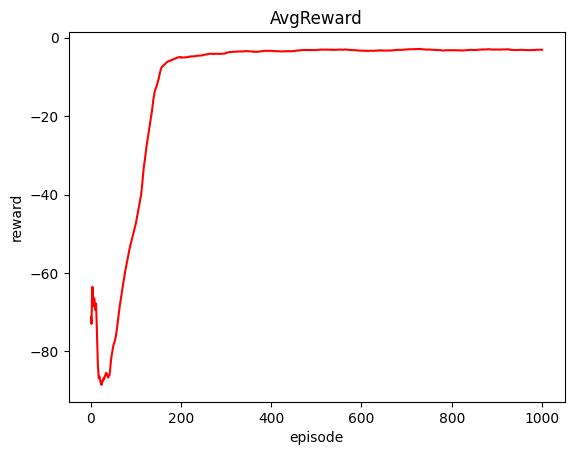

FileNotFoundError: [Errno 2] No such file or directory: './output_images/reward.png'

<Figure size 640x480 with 0 Axes>

In [4]:


agent = DDPG(alpha=0.0003, beta=0.0003, state_dim=41,
                action_dim=4, actor_fc1_dim=256, actor_fc2_dim=128,
                critic_fc1_dim=256, critic_fc2_dim=128, ckpt_dir=checkpoint_dir,
                batch_size=256)
create_directory(checkpoint_dir,
                    sub_paths=['Actor', 'Target_actor', 'Critic', 'Target_critic'])

reward_history = []
avg_reward_history = []
for episode in range(max_episodes):
    done = False
    total_reward = 0
    observation = env.reset()
    while not done:
        observation = observation[0]
        action = agent.choose_action(observation, train=True)
        action_ = scale_action(action.copy(), 1, -1)

        action_ = [action_]

        observation_, reward, done, cost,penalty_commuting,penalty_thermal = env.step(action_)

        agent.remember(observation, action, reward[0], observation_[0], done)
        agent.learn()
        total_reward += reward[0]
        observation = observation_

    reward_history.append(total_reward)
    avg_reward = np.mean(reward_history[-100:])
    avg_reward_history.append(avg_reward)
    print('Ep: {} Reward: {:.1f} AvgReward: {:.1f}'.format(episode+1, total_reward, avg_reward))

    if (episode + 1) % 200 == 0:
        agent.save_models(episode+1)

episodes = [i+1 for i in range(max_episodes)]
plot_learning_curve(episodes, avg_reward_history, title='AvgReward',
                    ylabel='reward', figure_file=figure_file)